In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 360 images belonging to 7 classes.
Found 120 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 360,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 120)

Epoch 1/100
11/11 [==============================] - 123s 11s/step - loss: 1.9422 - acc: 0.1829 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9046 - val_acc: 0.2500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 143s 13s/step - loss: 1.9280 - acc: 0.2529 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9060 - val_acc: 0.2500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 147s 13s/step - loss: 1.9252 - acc: 0.2415 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9020 - val_acc: 0.2500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 146s 13s/step - loss: 1.8949 - acc: 0.2693 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.9021 - val_acc: 0.2500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 146s 13s/step - loss: 1

Epoch 38/100
11/11 [==============================] - 123s 11s/step - loss: 1.5702 - acc: 0.3786 - precision: 0.5423 - recall: 0.1343 - val_loss: 1.5693 - val_acc: 0.3667 - val_precision: 0.6045 - val_recall: 0.2083
Epoch 39/100
11/11 [==============================] - 117s 11s/step - loss: 1.5408 - acc: 0.3920 - precision: 0.7048 - recall: 0.1278 - val_loss: 1.5917 - val_acc: 0.3333 - val_precision: 0.5220 - val_recall: 0.2167
Epoch 40/100
11/11 [==============================] - 112s 10s/step - loss: 1.6463 - acc: 0.3039 - precision: 0.6044 - recall: 0.1012 - val_loss: 1.5129 - val_acc: 0.3500 - val_precision: 0.6008 - val_recall: 0.2000
Epoch 41/100
11/11 [==============================] - 113s 10s/step - loss: 1.5630 - acc: 0.3636 - precision: 0.5750 - recall: 0.1864 - val_loss: 1.6053 - val_acc: 0.3500 - val_precision: 0.5144 - val_recall: 0.2250
Epoch 42/100
11/11 [==============================] - 112s 10s/step - loss: 1.5798 - acc: 0.3714 - precision: 0.4975 - recall: 0.1143 - 

Epoch 76/100
11/11 [==============================] - 178s 16s/step - loss: 1.3669 - acc: 0.4552 - precision: 0.6646 - recall: 0.2019 - val_loss: 1.3824 - val_acc: 0.3917 - val_precision: 0.6998 - val_recall: 0.2583
Epoch 77/100
11/11 [==============================] - 148s 13s/step - loss: 1.4241 - acc: 0.4375 - precision: 0.6572 - recall: 0.2131 - val_loss: 1.4278 - val_acc: 0.4250 - val_precision: 0.6406 - val_recall: 0.2667
Epoch 78/100
11/11 [==============================] - 140s 13s/step - loss: 1.4403 - acc: 0.4075 - precision: 0.5744 - recall: 0.1517 - val_loss: 1.3714 - val_acc: 0.4250 - val_precision: 0.6905 - val_recall: 0.2417
Epoch 79/100
11/11 [==============================] - 147s 13s/step - loss: 1.3206 - acc: 0.4716 - precision: 0.6926 - recall: 0.2159 - val_loss: 1.3532 - val_acc: 0.4333 - val_precision: 0.6788 - val_recall: 0.2333
Epoch 80/100
11/11 [==============================] - 141s 13s/step - loss: 1.4572 - acc: 0.4178 - precision: 0.5893 - recall: 0.1172 - 

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      angry       0.14      0.13      0.14        15
    disgust       0.14      0.07      0.09        15
    fearful       0.18      0.20      0.19        15
      happy       0.12      0.07      0.09        15
    neutral       0.27      0.40      0.32        30
        sad       0.11      0.13      0.12        15
  surprised       0.09      0.07      0.08        15

avg / total       0.17      0.18      0.17       120



Confusion matrix, without normalization
[[ 2  1  1  1  7  0  3]
 [ 2  1  0  1  7  3  1]
 [ 2  2  3  2  2  3  1]
 [ 2  0  2  1  4  4  2]
 [ 3  2  5  0 12  5  3]
 [ 3  1  4  1  4  2  0]
 [ 0  0  2  2  8  2  1]]


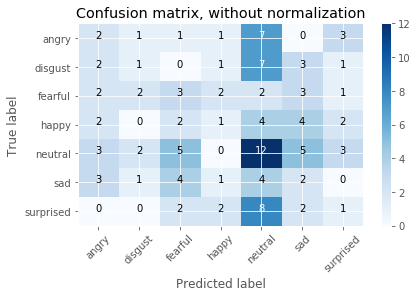

Normalized confusion matrix
[[13.3333  6.6667  6.6667  6.6667 46.6667  0.     20.    ]
 [13.3333  6.6667  0.      6.6667 46.6667 20.      6.6667]
 [13.3333 13.3333 20.     13.3333 13.3333 20.      6.6667]
 [13.3333  0.     13.3333  6.6667 26.6667 26.6667 13.3333]
 [10.      6.6667 16.6667  0.     40.     16.6667 10.    ]
 [20.      6.6667 26.6667  6.6667 26.6667 13.3333  0.    ]
 [ 0.      0.     13.3333 13.3333 53.3333 13.3333  6.6667]]


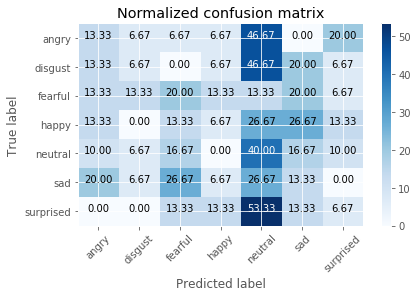

In [10]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

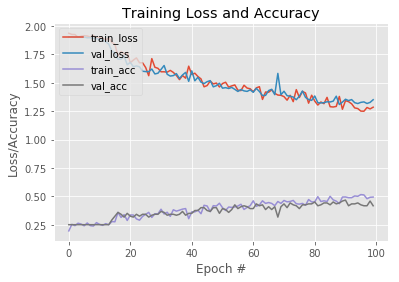

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")